# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Data Preprocessing](#3)
    - [3.1 Shape of the data](#3.1)
    - [3.2 Detect Outliers with IQR score rule](#3.2)
- [4. EDA and Feature Engineering](#4)
    - [4.1 One hot encoder](#4.1)
- [5. Assigning Feature and target variables](#5)
- [6. Feature Scaling](#6)
- [7. Spliting the data into Training and Testing Data](#7)
- [8. Modeling](#8)
    - [8.1 Logistic Regression](#8.1)
    - [8.2 Random Forest](#8.2)
    - [8.3 KNN](#8.3)
    - [8.4 Bagging](#8.4)
    - [8.5 Gradient Boosting](#8.5)
    - [8.6 Decision Tree](#8.6)
    - [8.7 SVM](#8.7)
- [9. TP, TN, FP, FN](#9)
    - [9.1 Logistic Regression](#9.1)
    - [9.2 Random Forest](#9.2)
    - [9.3 KNN](#9.3)
    - [9.4 Bagging](#9.4)
    - [9.5 Gradient Boosting](#9.5)
    - [9.6 Decision Tree](#9.6)
    - [9.7 SVM](#9.7)
- [10. Auto ML](#10)

<a id='1'></a>
# Project Description

Diabetes mellitus is characterized as a chronic disease may cause many complications. The machine learning algorithms are used to diagnosis and predict the diabetes. The learning based algorithms plays a vital role on supporting decision making in disease diagnosis and prediction. In this paper, traditional classification algorithms based machine learning are investigated for the diabetes dataset.

<a id='2'></a>
# Import Necssaries Librarie

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tpot import TPOTClassifier

import warnings
warnings.filterwarnings("ignore")

c:\Users\AbanobMorgan\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<a id="3"></a>
# Data Preprocessing

In [2]:
#read and load the data
df = pd.read_csv('../../../Datasets/Classification/diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<a id='3.1'></a>
***shape of the data***

In [3]:
#number of rows and columns of the data
df.shape # (768 rows and 9 columns)

(768, 9)

In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- the min value in  5 columns = 0 (Glucose, BloodPressure, Skin Thickness, Insulin, BMI)<br>
- In skin Thickness and Insulin Column less than or equal 25% of the data are null values
- look at the maximum Insulin Value = 846 wich is too high u will never find a person with this insulin value (outlier)<br>
all this an errors in data collection

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

convert those 0's values in these 5 columns to determine how many missing valuesin each feature in our data

In [8]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

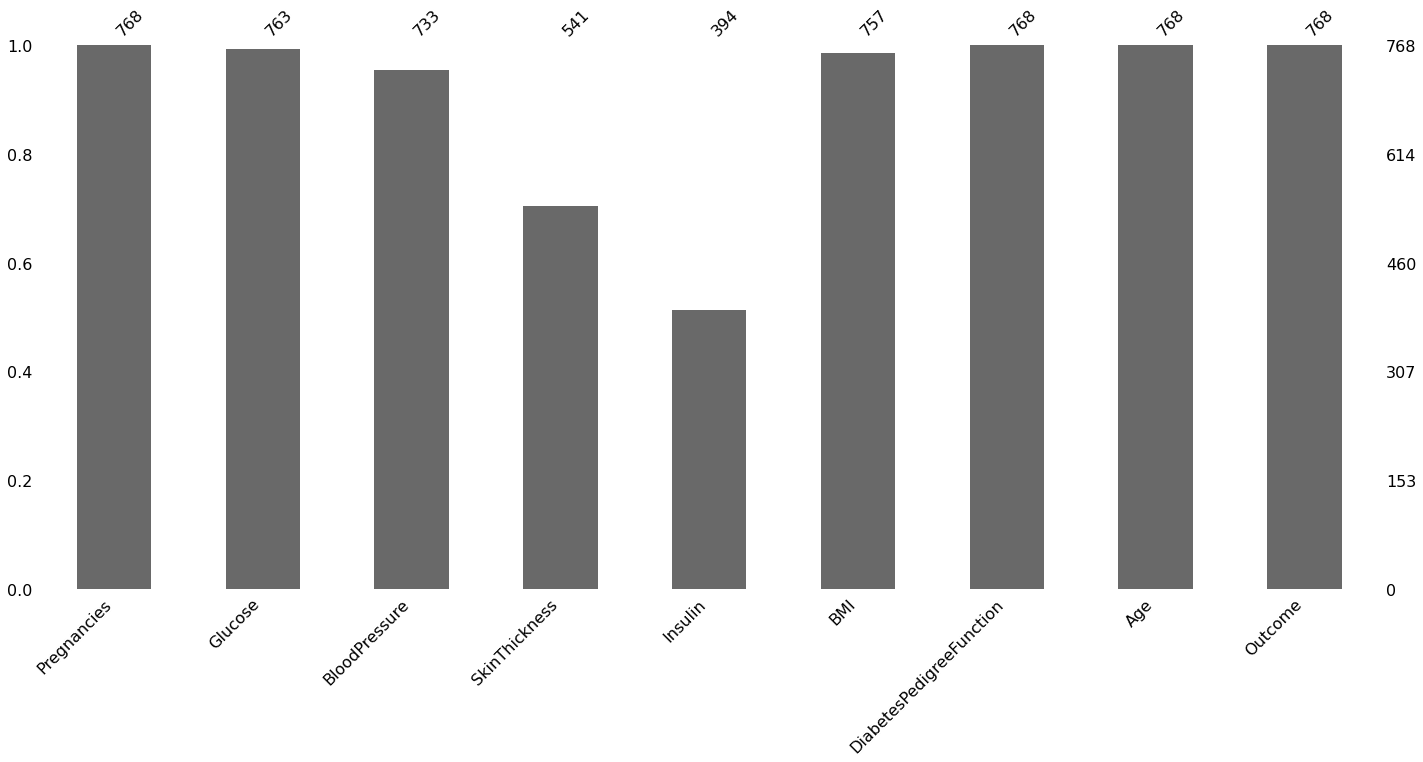

In [11]:
# using missingno library to visualize the data with neglecting the missing values
import missingno as msno
msno.bar(df);

In [12]:
df[df.Glucose.notnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [13]:
df[['Glucose', 'Outcome']].groupby(['Outcome'])[['Glucose']].median().reset_index()

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [14]:
# The missing values will be filled with the median values of each variable.
def median_target(var):   
    temp = df[df[var].notnull()] # Assign the not NAN values of specific column to the variable temp
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index() # groupby outcome and calculate the median for each outcome
    return temp

In [15]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [16]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [17]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [18]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for col in columns:
    
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<a id='3.2'></a>
***detect outliers with IQR score rule***

a brief description: <br>
IQR score The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.


Q1 is = 25% percintile value of the data<br>
Q3 is = 75% Percintile value of the data<br>
IQR = Q3 - Q1

In [20]:
# example for more understanding the rule
Q1 = df["Glucose"].quantile(0.25)
Q3 = df["Glucose"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlower = {lower}\nupper = {upper}")
print(f"\n\nConclusion: Any value not in this range (lower and upper) = {lower, upper} can be removed as an outlier")

Q1 = 99.75
Q3 = 140.25
IQR = 40.5
lower = 39.0
upper = 201.0


Conclusion: Any value not in this range (lower and upper) = (39.0, 201.0) can be removed as an outlier


In [21]:
#looping on all the features to see which feature has an outliers
#but with this rule we will take Q1 = 5% and Q3 = 95%
for feature in df:
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None) and df[(df[feature] < lower)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


So we have no outliers to remove

<a id='4'></a>
# EDA and Feature Engineering

In [22]:
df2 = df.copy()
df2.Outcome = df2.Outcome.apply(lambda x:'Healthy' if x == 0 else 'Sick')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick


In [23]:
df2.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                47
SkinThickness                50
Insulin                     187
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [24]:
df2.Outcome.value_counts()

Healthy    500
Sick       268
Name: Outcome, dtype: int64

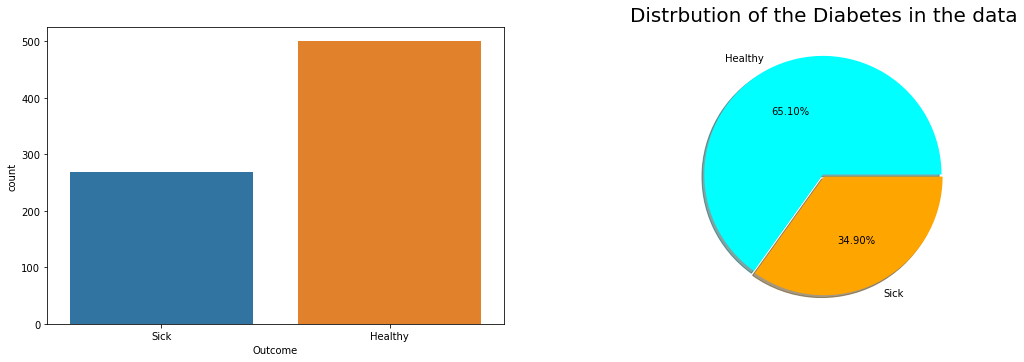

In [25]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Outcome', data=df2)

plt.subplot(2,2,2)
no_dib = df2[df.Outcome == 0].count()[0]
dib = df2[df.Outcome == 1].count()[0]
plt.title('Distrbution of the Diabetes in the data', {'fontsize' : 20})
plt.pie([no_dib, dib], labels=['Healthy', 'Sick'], autopct="%.2f%%", explode=[0.01,0.01], colors=['cyan', 'orange'], shadow=True)
plt.show()

We have 65% healthy pepole and 35% Sick pepole in the data

In [26]:
df2.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

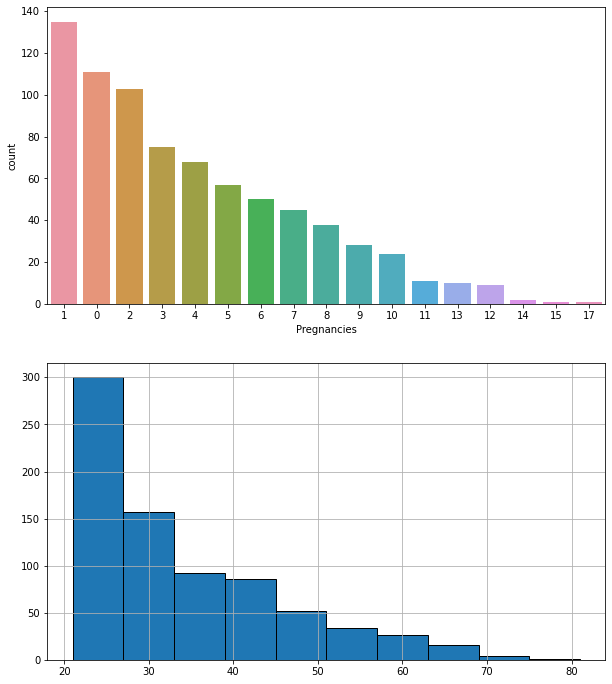

In [27]:
plt.figure(figsize=(22,12))

plt.subplot(2,2,1)
order = df2.groupby('Pregnancies').count().sort_values(by='Outcome', ascending=False).index
sns.countplot(x='Pregnancies', data=df2, order=order);

plt.subplot(2,2,3)
df["Age"].hist(edgecolor = "black");

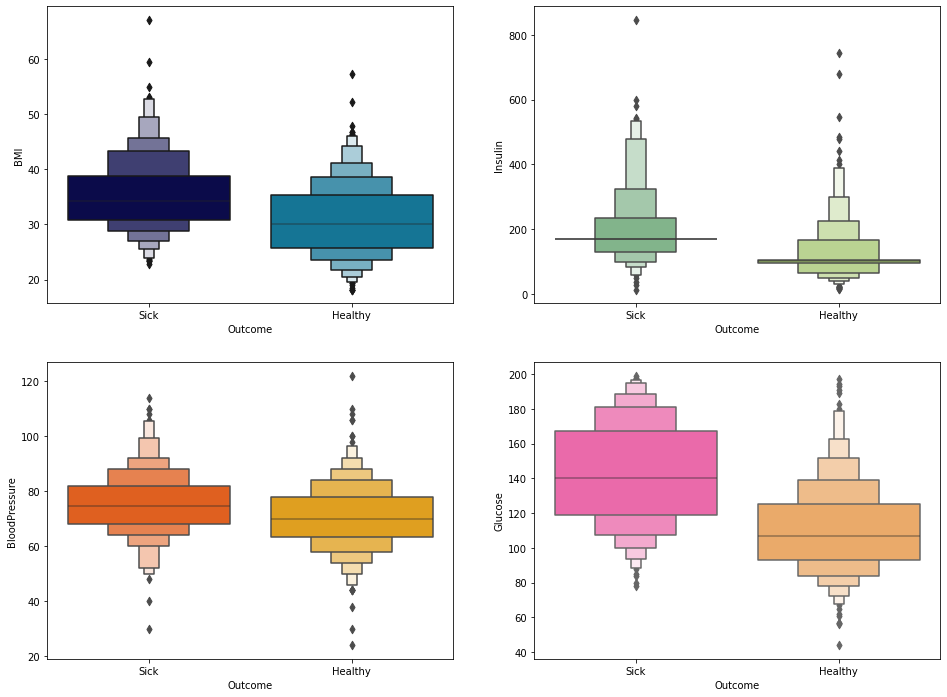

In [28]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.boxenplot(x='Outcome', y='BMI', data=df2, palette='ocean')

plt.subplot(2,2,2)
sns.boxenplot(x='Outcome', y='Insulin', data=df2, palette='summer')

plt.subplot(2,2,3)
sns.boxenplot(x='Outcome', y='BloodPressure', data=df2, palette='autumn')

plt.subplot(2,2,4)
sns.boxenplot(x='Outcome', y='Glucose', data=df2, palette='spring');

It seems that when these features are increasingly increasingly an opportunity for diabetes

In [29]:
# According to BMI, some ranges were determined and categorical variables were assigned.

NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df2["NewBMI"] = NewBMI

df2.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

df2.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df2.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df2.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df2.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df2.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick,Obesity 3


In [30]:
df2.NewBMI.value_counts()

Obesity 1      235
Overweight     179
Obesity 2      150
Normal         102
Obesity 3       98
Underweight      4
Name: NewBMI, dtype: int64

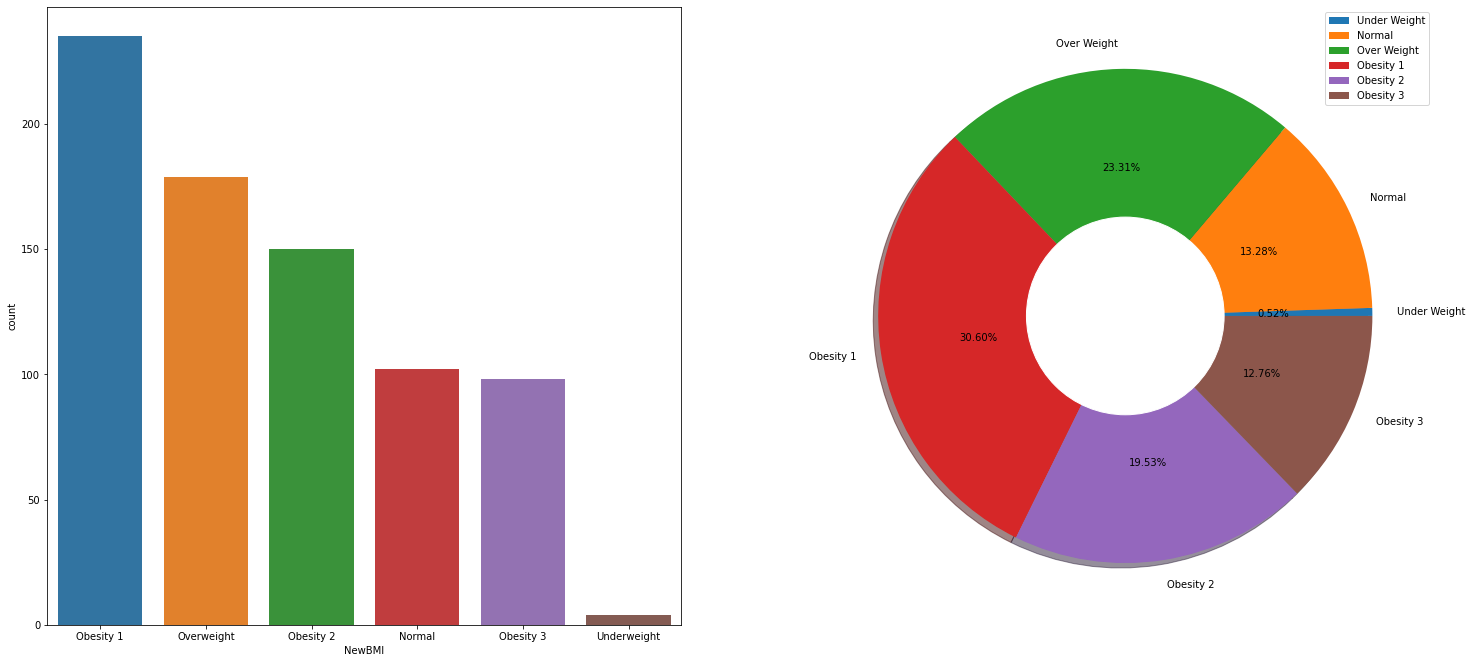

In [31]:
plt.figure(figsize=(25,25))

plt.subplot(2,2,1)
order = df2.groupby('NewBMI').count().sort_values(by='Outcome', ascending=False).index
sns.countplot(x='NewBMI', data=df2, order=order)

plt.subplot(2,2,2)
Under_wei = df2.NewBMI[df2.NewBMI == 'Underweight'].count()
normal = df2.NewBMI[df2.NewBMI == 'Normal'].count()
over_weight = df2.NewBMI[df2.NewBMI == 'Overweight'].count()
obesity_1 = df2.NewBMI[df2.NewBMI == 'Obesity 1'].count()
obesity_2 = df2.NewBMI[df2.NewBMI == 'Obesity 2'].count()
obesity_3 = df2.NewBMI[df2.NewBMI == 'Obesity 3'].count()
weights = [Under_wei, normal, over_weight, obesity_1, obesity_2, obesity_3]
labels = ['Under Weight', 'Normal', 'Over Weight', 'Obesity 1', 'Obesity 2', 'Obesity 3']
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.pie(weights, labels=labels, autopct="%.2f%%", shadow=True);
plt.legend()
plt.show()

Obesity 1 has the majority in the data which the BMI between 29.9 and 34.9

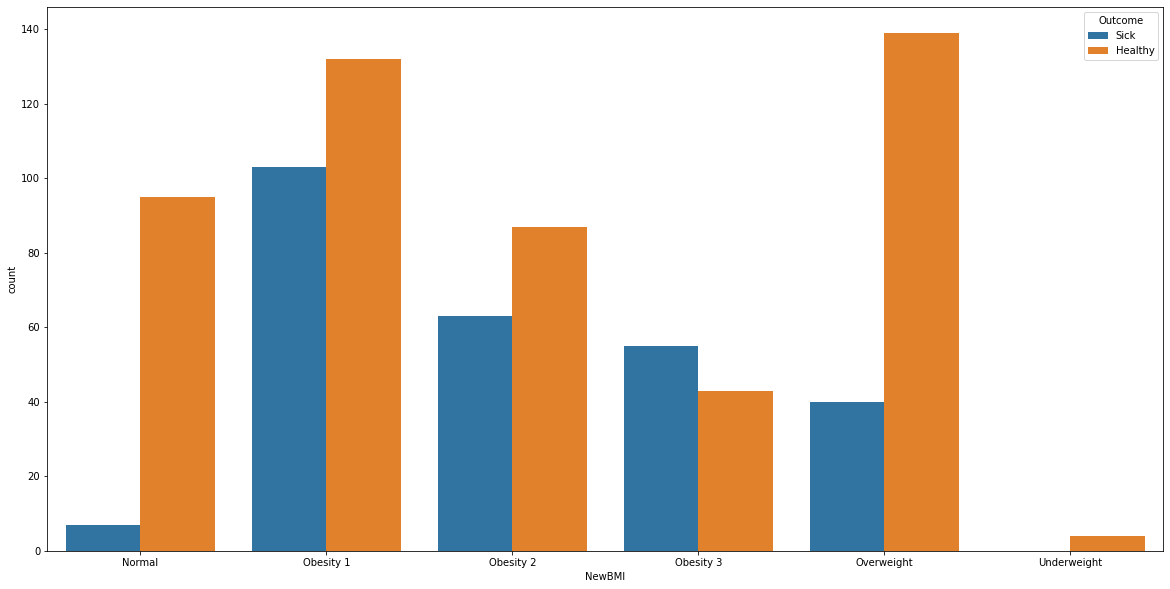

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x='NewBMI', hue='Outcome', data=df2);

all the Underweights is healthy (BMI less than 18.5)<br>
Normal Weights are healthy except limited number which are sick<br>
it seems that when the weight increase so you are more likely to have diabetes

In [33]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"     

In [34]:
df2["NewInsulinScore"] = df2.apply(set_insulin, axis=1)

In [35]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick,Obesity 3,Abnormal


In [36]:
df2.NewInsulinScore.value_counts()

Normal      496
Abnormal    272
Name: NewInsulinScore, dtype: int64

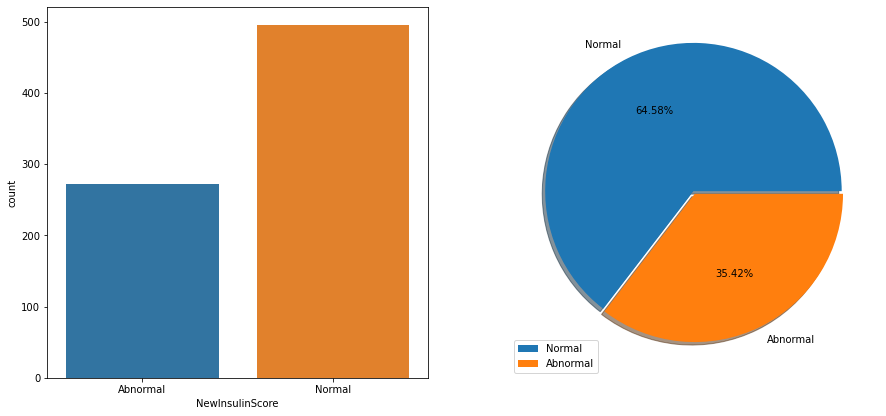

In [37]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x='NewInsulinScore', data=df2);

plt.subplot(2,2,2)
normal = df2.NewInsulinScore[df2.NewInsulinScore == 'Normal'].count()
abnormal = df2.NewInsulinScore[df2.NewInsulinScore == 'Abnormal'].count()
plt.pie([normal, abnormal], labels=['Normal', 'Abnormal'], autopct='%.2f%%', explode = [0.01,0.01], shadow=True)
plt.legend()
plt.show()

64.58% normal Insulin<br>
35.42% abnormal Insulin

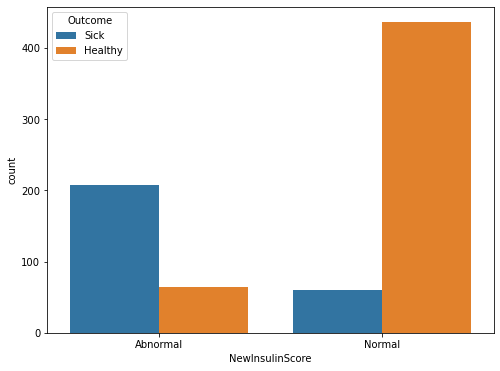

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='NewInsulinScore', hue='Outcome', data=df2);

In [39]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df2["NewGlucose"] = NewGlucose
df2.loc[df2["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df2.loc[(df2["Glucose"] > 70) & (df2["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df2.loc[(df2["Glucose"] > 99) & (df2["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df2.loc[df2["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [40]:
df2.NewGlucose.value_counts()

Secret        290
Overweight    286
Normal        181
Low            11
High            0
Name: NewGlucose, dtype: int64

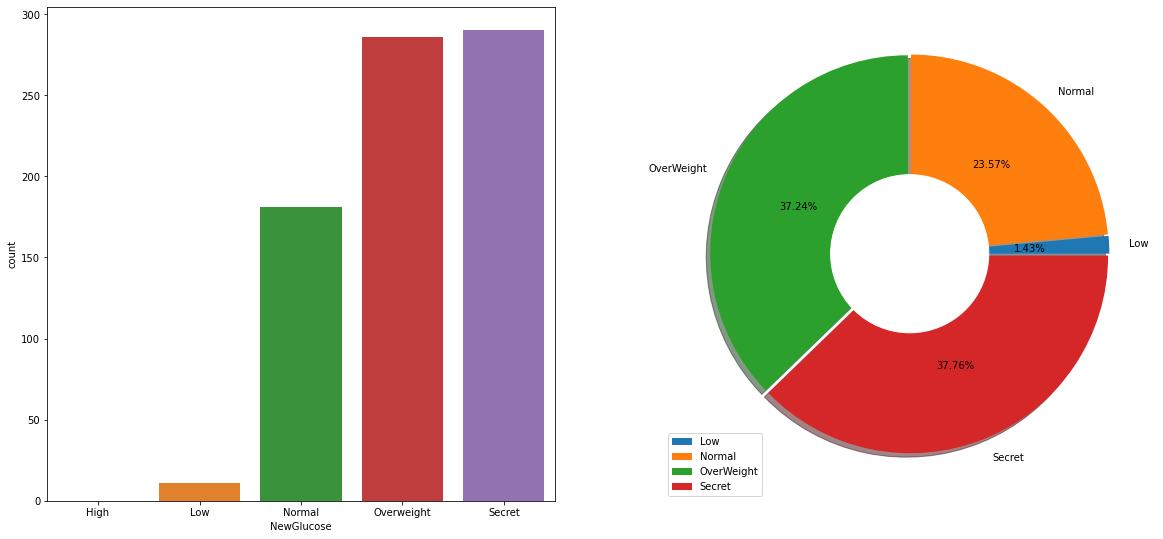

In [41]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(x='NewGlucose', data=df2);

plt.subplot(2,2,2)
low = df2.NewGlucose[df2.NewGlucose == 'Low'].count()
normal = df2.NewGlucose[df2.NewGlucose == 'Normal'].count()
over_wei = df2.NewGlucose[df2.NewGlucose == 'Overweight'].count()
secret = df2.NewGlucose[df2.NewGlucose == 'Secret'].count()
weight = [low, normal, over_wei, secret]
labels = ['Low', 'Normal', 'OverWeight', 'Secret']
plt.pie(weight, labels=labels, autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01,0.01]);
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()
plt.show()

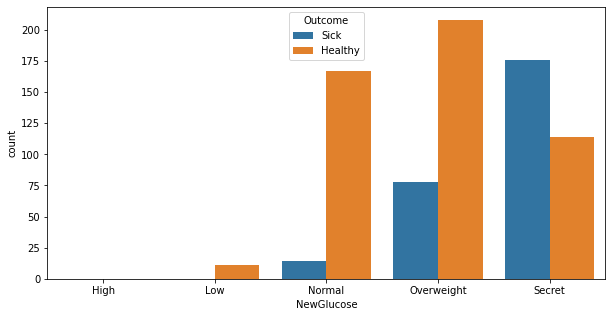

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='NewGlucose', hue='Outcome', data=df2);

When the Glucose is Secret then you are more likely to have diabetes

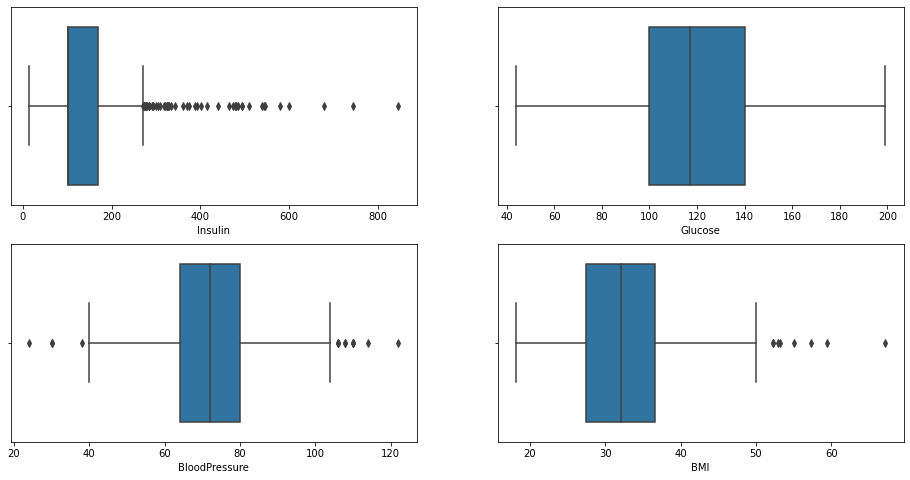

In [43]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x='Insulin', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='Glucose', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='BloodPressure', data=df)

plt.subplot(2,2,4)
sns.boxplot(x='BMI', data=df);

<a id='4.1'></a>
***One hot encoder***

In [44]:
df2 = pd.get_dummies(df2,drop_first=True)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_Sick,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [45]:
df2.shape

(768, 19)

In [46]:
categorical_features = [col for col in df2.columns if df2[col].nunique() <= 5]

In [47]:
categorical_features

['Outcome_Sick',
 'NewBMI_Obesity 1',
 'NewBMI_Obesity 2',
 'NewBMI_Obesity 3',
 'NewBMI_Overweight',
 'NewBMI_Underweight',
 'NewInsulinScore_Normal',
 'NewGlucose_Low',
 'NewGlucose_Normal',
 'NewGlucose_Overweight',
 'NewGlucose_Secret']

In [48]:
cont_features = [col for col in df2.columns if df2[col].nunique() > 20]
cont_features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

<a id='5'></a>
# Assign Feature and Target Variable

In [49]:
X = df2.drop('Outcome_Sick', axis=1)
y = df2.Outcome_Sick
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,0,0,1,0,0,0,0,0,0,1


<a id='6'></a>
# Feature Scaling

In [51]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
X_scale = scaler.transform(X)
X_scale = pd.DataFrame(X_scale, columns = X.columns)

In [52]:
X_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0


In [53]:
X = pd.concat([X, df2[categorical_features]], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,...,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,...,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,0,0,...,0,0,1,0,0,0,0,0,0,1


In [54]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret',
       'Outcome_Sick', 'NewBMI_Obesity 1', 'NewBMI_Obesity 2',
       'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight',
       'NewInsulinScore_Normal', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [55]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome_Sick, dtype: uint8

In [56]:
X.drop('Outcome_Sick', axis=1, inplace=True)

<a id='7'></a>
# Spliting the data into Training and Testing Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y , test_size=0.25, random_state=0)

<a id='8'></a>
# Modeling

In [58]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='8.1'></a>
## Logistic Regression

In [59]:
lr = LogisticRegression()
kfolds(lr, "Logistic Regression")
train(lr, "Logistic Regression")

Logistic Regression score on cross validation: 83.45811051693404%
Logistic Regression model score on Training data: 84.72222222222221%
Logistic Regression model score on Testing data: 88.54166666666666%


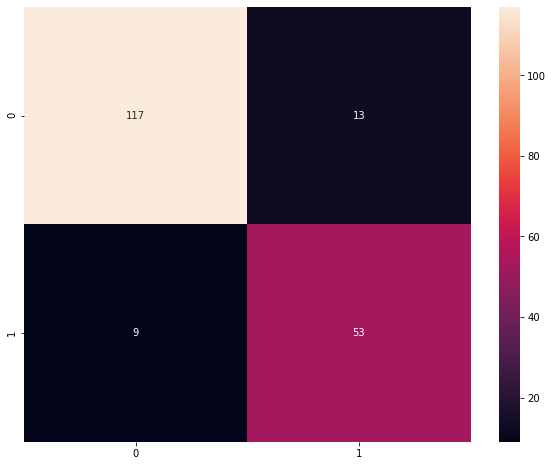

In [60]:
conf_matrix(lr)

In [61]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       130
           1       0.80      0.85      0.83        62

    accuracy                           0.89       192
   macro avg       0.87      0.88      0.87       192
weighted avg       0.89      0.89      0.89       192



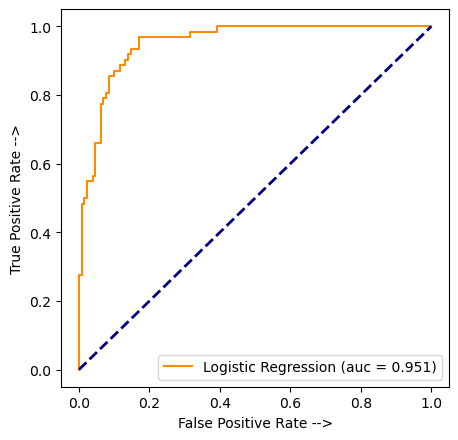

In [62]:
roc(lr, "Logistic Regression")

<a id='8.2'></a>
## Random Forest

In [63]:
rf = RandomForestClassifier()
kfolds(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 86.98327815974875%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 92.1875%


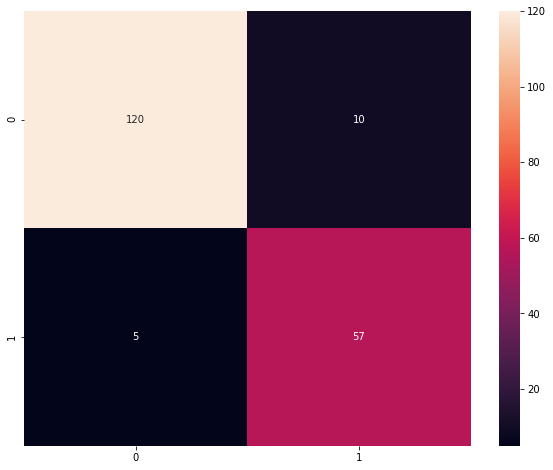

In [64]:
conf_matrix(rf)

In [65]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       130
           1       0.85      0.92      0.88        62

    accuracy                           0.92       192
   macro avg       0.91      0.92      0.91       192
weighted avg       0.92      0.92      0.92       192



<a id='8.3'></a>
## KNN

In [66]:
knn = KNeighborsClassifier()
kfolds(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 85.54536966301673%
KNN model score on Training data: 88.19444444444444%
KNN model score on Testing data: 88.02083333333334%


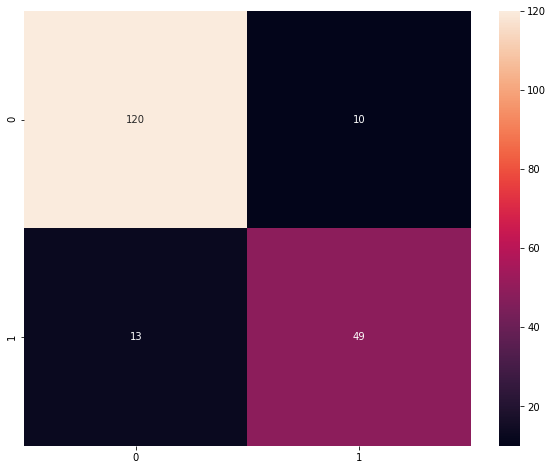

In [67]:
conf_matrix(knn)

In [68]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       130
           1       0.83      0.79      0.81        62

    accuracy                           0.88       192
   macro avg       0.87      0.86      0.86       192
weighted avg       0.88      0.88      0.88       192



<a id='8.4'></a>
## Bagging

In [69]:
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 88.80400645106528%
Bagging model score on Training data: 99.13194444444444%
Bagging model score on Testing data: 90.625%


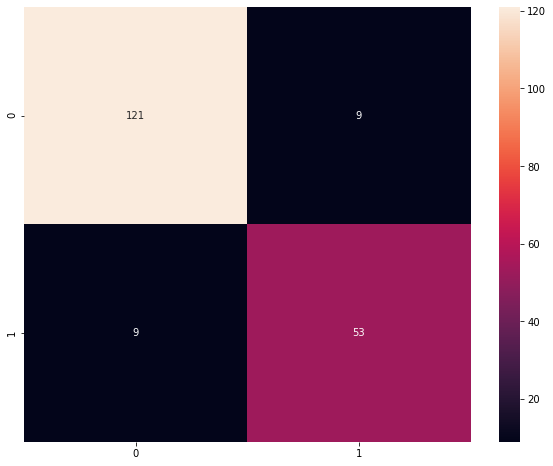

In [70]:
conf_matrix(bagg_model)

<a id='8.5'></a>
## Gradient Boosting

In [71]:
gb_model = GradientBoostingClassifier(n_estimators=150, random_state=20)
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 89.19701213818861%
Boosting model score on Training data: 99.82638888888889%
Boosting model score on Testing data: 94.27083333333334%


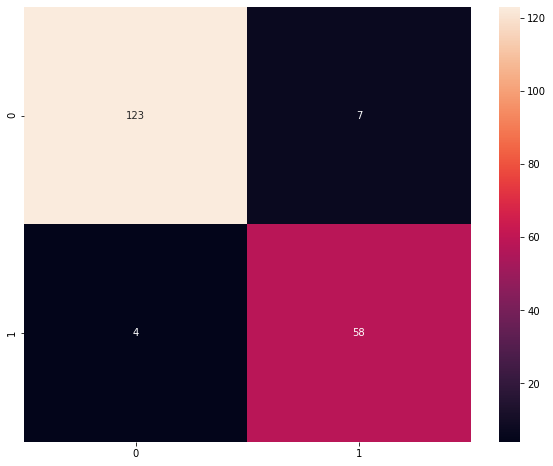

In [72]:
conf_matrix(gb_model)

In [73]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       130
           1       0.89      0.94      0.91        62

    accuracy                           0.94       192
   macro avg       0.93      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



<a id='8.6'></a>
## Decision Tree

In [74]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 86.32968338850692%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 84.375%


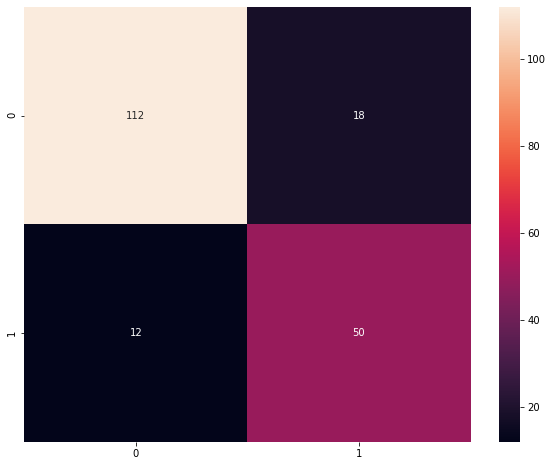

In [75]:
conf_matrix(dt_model)

In [76]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       130
           1       0.74      0.81      0.77        62

    accuracy                           0.84       192
   macro avg       0.82      0.83      0.83       192
weighted avg       0.85      0.84      0.85       192



<a id='8.7'></a>
## SVM

In [77]:
svm_model = SVC(kernel='rbf')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 84.24242424242424%
SVM model score on Training data: 89.58333333333334%
SVM model score on Testing data: 89.58333333333334%


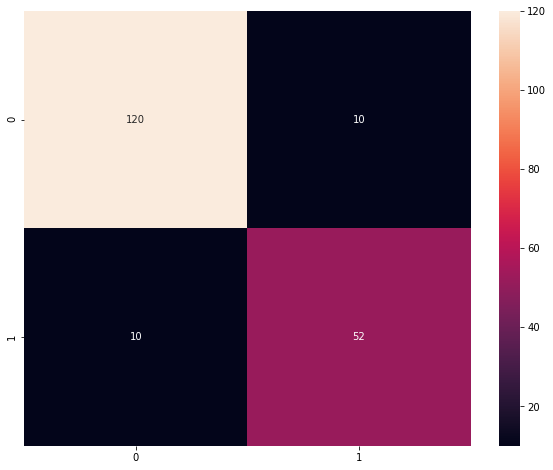

In [78]:
conf_matrix(svm_model)

In [79]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       130
           1       0.84      0.84      0.84        62

    accuracy                           0.90       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.90      0.90      0.90       192



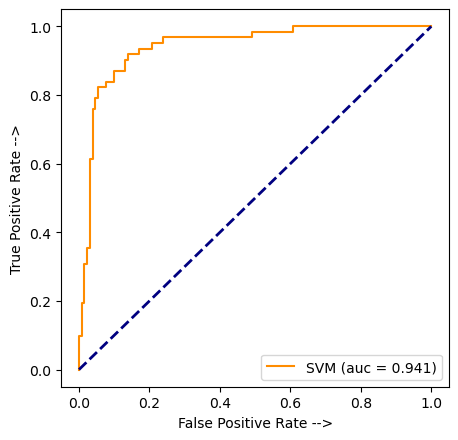

In [80]:
roc(svm_model, "SVM")

<a id='8.8'></a>
## Xgboost

In [81]:
xgboost = XGBClassifier()
train(xgboost, "Xgboost")

[20:57:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost model score on Training data: 100.0%
Xgboost model score on Testing data: 92.1875%


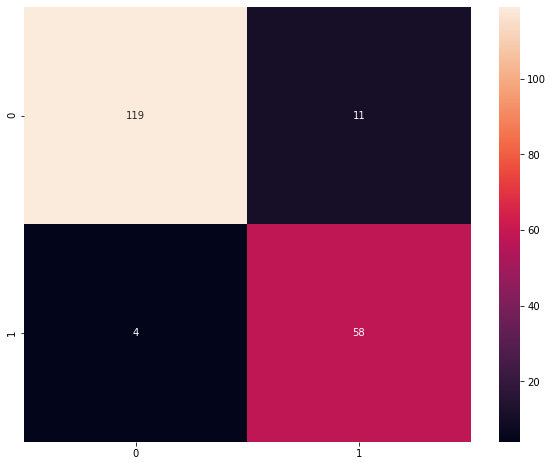

In [82]:
conf_matrix(xgboost)

In [83]:
class_report(xgboost)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       130
           1       0.84      0.94      0.89        62

    accuracy                           0.92       192
   macro avg       0.90      0.93      0.91       192
weighted avg       0.93      0.92      0.92       192



<a id='9'></a>
# TP, TN, FP, FN

In [84]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP) 
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"TP, FN, TP, FP Overall Accuarcy of {model_name}: {ACC*100}%")
    print(f"Sensitivity Accuarcy of {model_name}: {TPR * 100}%")
    print(f"Specificity Negative Rate Accuarcy of {model_name}: {TNR * 100}%")
    print(f"Negative predictive value Accuarcy of {model_name}: {NPV * 100}%")
    print(f"Fall out Accuarcy of {model_name}: {FPR * 100}%")
    print(f"False negative rate Accuarcy of {model_name}: {FNR * 100}%")
    print(f"False discovery rate Accuarcy of {model_name}: {FDR * 100}%")

<a id='9.1'></a>
## Logistic Regression

In [85]:
tp(lr, "Logistic Regression")

TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 88.54166666666666%
Sensitivity Accuarcy of Logistic Regression: 85.48387096774194%
Specificity Negative Rate Accuarcy of Logistic Regression: 90.0%
Negative predictive value Accuarcy of Logistic Regression: 92.85714285714286%
Fall out Accuarcy of Logistic Regression: 10.0%
False negative rate Accuarcy of Logistic Regression: 14.516129032258066%
False discovery rate Accuarcy of Logistic Regression: 19.696969696969695%


<a id='9.1'></a>
## Random Forest

In [86]:
tp(rf, "Random Forest")

TP, FN, TP, FP Overall Accuarcy of Random Forest: 92.1875%
Sensitivity Accuarcy of Random Forest: 91.93548387096774%
Specificity Negative Rate Accuarcy of Random Forest: 92.3076923076923%
Negative predictive value Accuarcy of Random Forest: 96.0%
Fall out Accuarcy of Random Forest: 7.6923076923076925%
False negative rate Accuarcy of Random Forest: 8.064516129032258%
False discovery rate Accuarcy of Random Forest: 14.925373134328357%


<a id='9.3'></a>
## KNN

In [87]:
tp(knn, "KNN")

TP, FN, TP, FP Overall Accuarcy of KNN: 88.02083333333334%
Sensitivity Accuarcy of KNN: 79.03225806451613%
Specificity Negative Rate Accuarcy of KNN: 92.3076923076923%
Negative predictive value Accuarcy of KNN: 90.22556390977444%
Fall out Accuarcy of KNN: 7.6923076923076925%
False negative rate Accuarcy of KNN: 20.967741935483872%
False discovery rate Accuarcy of KNN: 16.94915254237288%


<a id='9.4'></a>
## Bagging

In [88]:
tp(bagg_model, "Bagging")

TP, FN, TP, FP Overall Accuarcy of Bagging: 90.625%
Sensitivity Accuarcy of Bagging: 85.48387096774194%
Specificity Negative Rate Accuarcy of Bagging: 93.07692307692308%
Negative predictive value Accuarcy of Bagging: 93.07692307692308%
Fall out Accuarcy of Bagging: 6.923076923076923%
False negative rate Accuarcy of Bagging: 14.516129032258066%
False discovery rate Accuarcy of Bagging: 14.516129032258066%


<a id='9.1'></a>
## Gradient Boosting

In [89]:
tp(gb_model, "Gradient Boosting")

TP, FN, TP, FP Overall Accuarcy of Gradient Boosting: 94.27083333333334%
Sensitivity Accuarcy of Gradient Boosting: 93.54838709677419%
Specificity Negative Rate Accuarcy of Gradient Boosting: 94.61538461538461%
Negative predictive value Accuarcy of Gradient Boosting: 96.8503937007874%
Fall out Accuarcy of Gradient Boosting: 5.384615384615385%
False negative rate Accuarcy of Gradient Boosting: 6.451612903225806%
False discovery rate Accuarcy of Gradient Boosting: 10.76923076923077%


<a id='9.6'></a>
## Decision Tree

In [90]:
tp(dt_model, "Decision Tree")

TP, FN, TP, FP Overall Accuarcy of Decision Tree: 84.375%
Sensitivity Accuarcy of Decision Tree: 80.64516129032258%
Specificity Negative Rate Accuarcy of Decision Tree: 86.15384615384616%
Negative predictive value Accuarcy of Decision Tree: 90.32258064516128%
Fall out Accuarcy of Decision Tree: 13.846153846153847%
False negative rate Accuarcy of Decision Tree: 19.35483870967742%
False discovery rate Accuarcy of Decision Tree: 26.47058823529412%


<a id='9.7'></a>
## SVM

In [91]:
tp(svm_model, "SVM")

TP, FN, TP, FP Overall Accuarcy of SVM: 89.58333333333334%
Sensitivity Accuarcy of SVM: 83.87096774193549%
Specificity Negative Rate Accuarcy of SVM: 92.3076923076923%
Negative predictive value Accuarcy of SVM: 92.3076923076923%
Fall out Accuarcy of SVM: 7.6923076923076925%
False negative rate Accuarcy of SVM: 16.129032258064516%
False discovery rate Accuarcy of SVM: 16.129032258064516%


<a id='9.8'></a>
## Xgboost

In [92]:
tp(xgboost, "Xgboost")

TP, FN, TP, FP Overall Accuarcy of Xgboost: 92.1875%
Sensitivity Accuarcy of Xgboost: 93.54838709677419%
Specificity Negative Rate Accuarcy of Xgboost: 91.53846153846153%
Negative predictive value Accuarcy of Xgboost: 96.7479674796748%
Fall out Accuarcy of Xgboost: 8.461538461538462%
False negative rate Accuarcy of Xgboost: 6.451612903225806%
False discovery rate Accuarcy of Xgboost: 15.942028985507244%


<a id='9'></a>
# Auto ML

In [93]:
tpot_model = TPOTClassifier(generations=5, population_size=100, 
                       verbosity=2, cv = 5, random_state=69, scoring='accuracy')
train(tpot_model, "Automated ML")

                                                                              
Generation 1 - Current best internal CV score: 0.8784407796101951
                                                                              
Generation 2 - Current best internal CV score: 0.8819790104947526
                                                                              
Generation 3 - Current best internal CV score: 0.8854272863568216
                                                                              
Generation 4 - Current best internal CV score: 0.8854272863568216
                                                                              
Generation 5 - Current best internal CV score: 0.8854272863568216
                                                                              
Best pipeline: GradientBoostingClassifier(BernoulliNB(StandardScaler(SelectFwe(input_matrix, alpha=0.001)), alpha=0.001, fit_prior=True), learning_rate=0.1, max_depth=9, max_features=0.3, min_samp

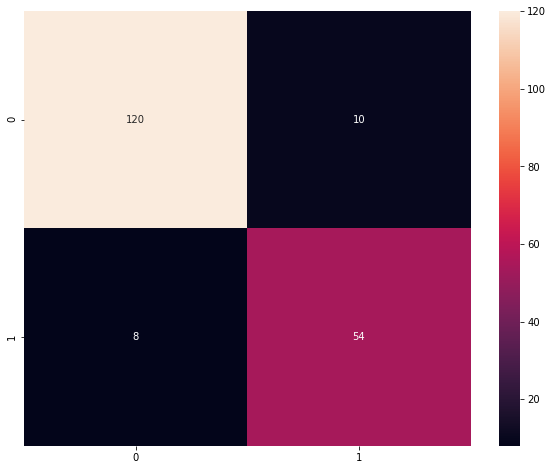

In [94]:
conf_matrix(tpot_model)

In [95]:
class_report(tpot_model)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       130
           1       0.84      0.87      0.86        62

    accuracy                           0.91       192
   macro avg       0.89      0.90      0.89       192
weighted avg       0.91      0.91      0.91       192

